In [1]:
%matplotlib inline
from matplotlib import rcParams

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering?
2. What are the main steps in the standard process of clustering?
3. What is the Silhouette coefficient?
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?

<span style='color:green'> Clustering is : </span>
<span style='color:yellow'> an unsupervised ML technique that is used for grouppig data points based on their similarities / dissimilarities (features), it labels data into separate clusters (that is why it is called clustering). A cluster is a collection of data points that are similar to each other but different to points in other cluster (main principal is: the same cluster - must be similar as much as possible, the different clusters - must be different as much as possible). To measure similarities you calculate distance metrics: points with smaller distances between them are more similar. </span>

<span style='color:green'> What are the main steps in the standard process of clustering? </span>

<span style='color:yellow'> After data cleaning and standardization, you pick an algo (K-means, hierarchical, DBScan or Gaussian mixture). In some cases you pick the number of clusters (like in K-means) that defines the number of centroids (use elbow metod to choose the right number of clusters). Centroid is a "center" of a cluster (min the distance between all points of the claster). After that it measures the distance between a centroid and each point, assigning each point to a nearest centroid. Once all points are assigned, it moves the centroids as the mean of all points in the cluster. It repeats this algo till the position of centroid is stable. </span>

<span style='color:yellow'> In general each algo groups the data points based on their similarities (may involve several iterations). Then it evaluate the results: by either sum of squared distances, silhouette score: measures how similar each point to the cluster compared to other clusters. </span>

<span style='color:green'>What is the Silhouette coefficient? </span>

<span style='color:yellow'>It is a metric to evaluate the quality of clustering.</span>

<span style='color:yellow'>It is a difference of mean of distances of a point between each point of its own cluster and of a mean of distances of a point between each point of the nearest cluster, devided then by the biggest value between these two. Overall Silhouette Score: is a Silhouette coefficient averaged across all data points in the dataset. </span>

<span style='color:yellow'>If it is closed to 1: well-separated clusters </span>

<span style='color:yellow'>If it is closed to 0: overlapping clusters </span>

<span style='color:yellow'>If it is negative: potential misassignments </span>

<span style='color:green'>What are the two types of evaluation for a clustering algorithm and what is the difference between them?</span>

<span style='color:yellow'>Internal evaluation and External evaluation</span>

<span style='color:yellow'>Internal evaluation assesses the quality of a clustering result based solely on the data that was clustered.</span>
<span style='color:yellow'>External evaluation assesses the quality of a clustering result by comparing it to a predefined ground truth or known labels.</span>

### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [5]:
# code here
df = pd.read_csv('../data/bank-full.csv',sep=';')

Print a summary of the data as well as the first 5 rows.

In [6]:
# code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


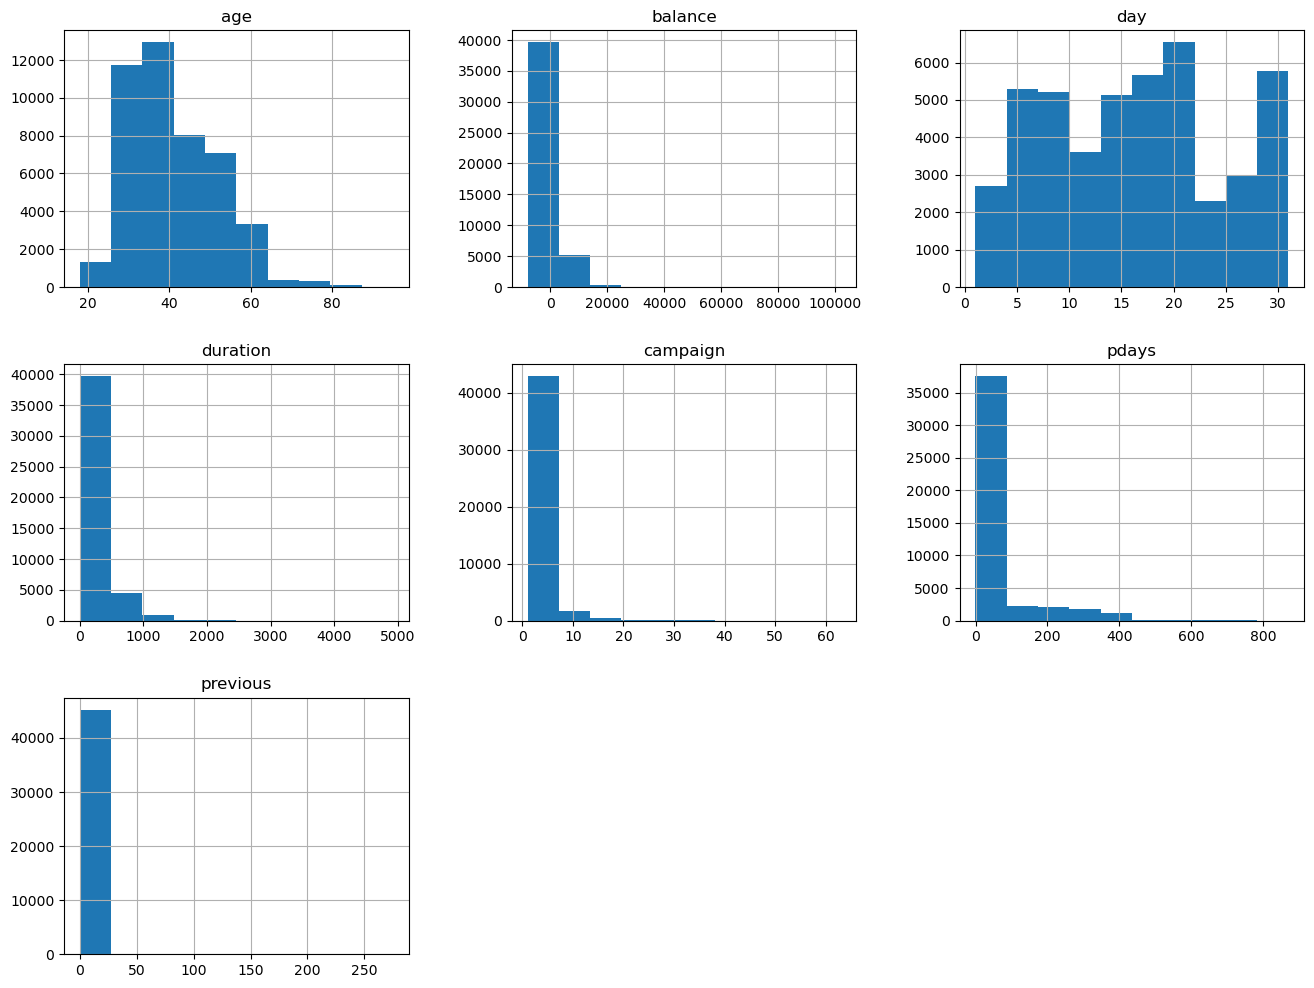

In [7]:
# code here
rcParams['figure.figsize'] = 16,12
plots = df.hist()

### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

In [9]:
# code here
#code here
df['month'] = df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
                               'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
                               'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})

df['dayoftheyear'] = pd.to_datetime(df[['month', 'day']].assign(year=1984))
df['dayoftheyear'] = df['dayoftheyear'].dt.dayofyear

In [10]:
df = df.drop(['day','month'],axis =1)

In [12]:
numerical_features = ['age', 'balance', 'campaign', 'pdays', 'previous','dayoftheyear','y']

In [18]:
df = df[['age', 'balance', 'campaign', 'pdays', 'previous','y']]

In [16]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

/tmp/ipykernel_6162/2661479507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].map({'no': 0, 'yes': 1})


In [19]:
df.head()

,age,balance,campaign,pdays,previous,y
0,58,2143,1,-1,0,0
1,44,29,1,-1,0,0
2,33,2,1,-1,0,0
3,47,1506,1,-1,0,0
4,33,1,1,-1,0,0


In [20]:
X = df
y = df.pop('y')

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
norm = MinMaxScaler()

X_norm = norm.fit_transform(X)

In [36]:
X_norm = pd.DataFrame(X_norm, columns = X.columns)

In [37]:
X_norm.head()

,age,balance,campaign,pdays,previous
0,0.519481,0.092259,0.0,0.0,0.0
1,0.337662,0.073067,0.0,0.0,0.0
2,0.194805,0.072822,0.0,0.0,0.0
3,0.376623,0.086476,0.0,0.0,0.0
4,0.194805,0.072812,0.0,0.0,0.0


Plot histograms of features

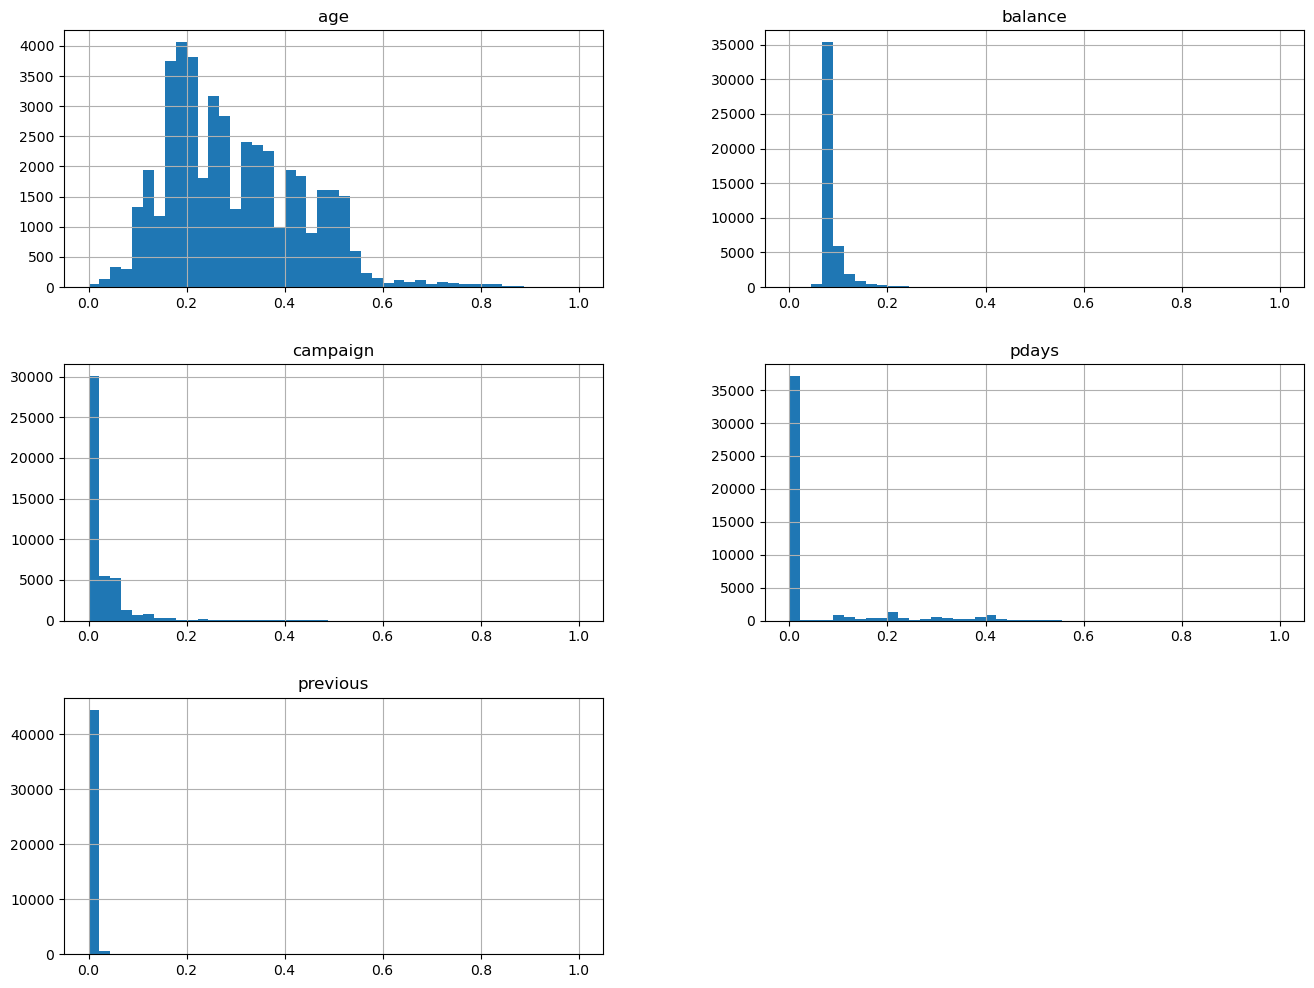

In [34]:
# code here
rcParams['figure.figsize'] = 16,12
plots = X_norm.hist(bins=45)

## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?
2. How can you compute a centroid?
3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?


*Answer here*

#### Make the necessary imports from scikit learn in order to perform KMeans clustering

In [39]:
# code here
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by performing a clustering of the data in *df_norm* into 5 clusters.

In [40]:
# code here
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_norm)

KMeans(n_clusters=5)

Print the centroids obtained

In [41]:
# code here
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [43]:
print(pd.DataFrame(centroids))

          0         1         2         3         4
0  0.318095  0.085028  0.033868  0.005204  0.000521
1  0.174892  0.082934  0.027522  0.007104  0.000776
2  0.261435  0.084365  0.018267  0.328325  0.011432
3  0.643379  0.096333  0.016022  0.115262  0.006894
4  0.470064  0.088348  0.030629  0.006858  0.000663


Print the cluster labels assigned to each point

In [45]:
# code here
print(pd.DataFrame(labels))

       0
0      4
1      0
2      1
3      0
4      1
...   ..
45206  4
45207  3
45208  3
45209  4
45210  2

[45211 rows x 1 columns]


### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pd.DataFrame(pca.fit_transform(X_norm),columns = ['pca1','pca2'])
pca_centroids = pd.DataFrame(pca.fit_transform(centroids), columns = ['pca1','pca2'])

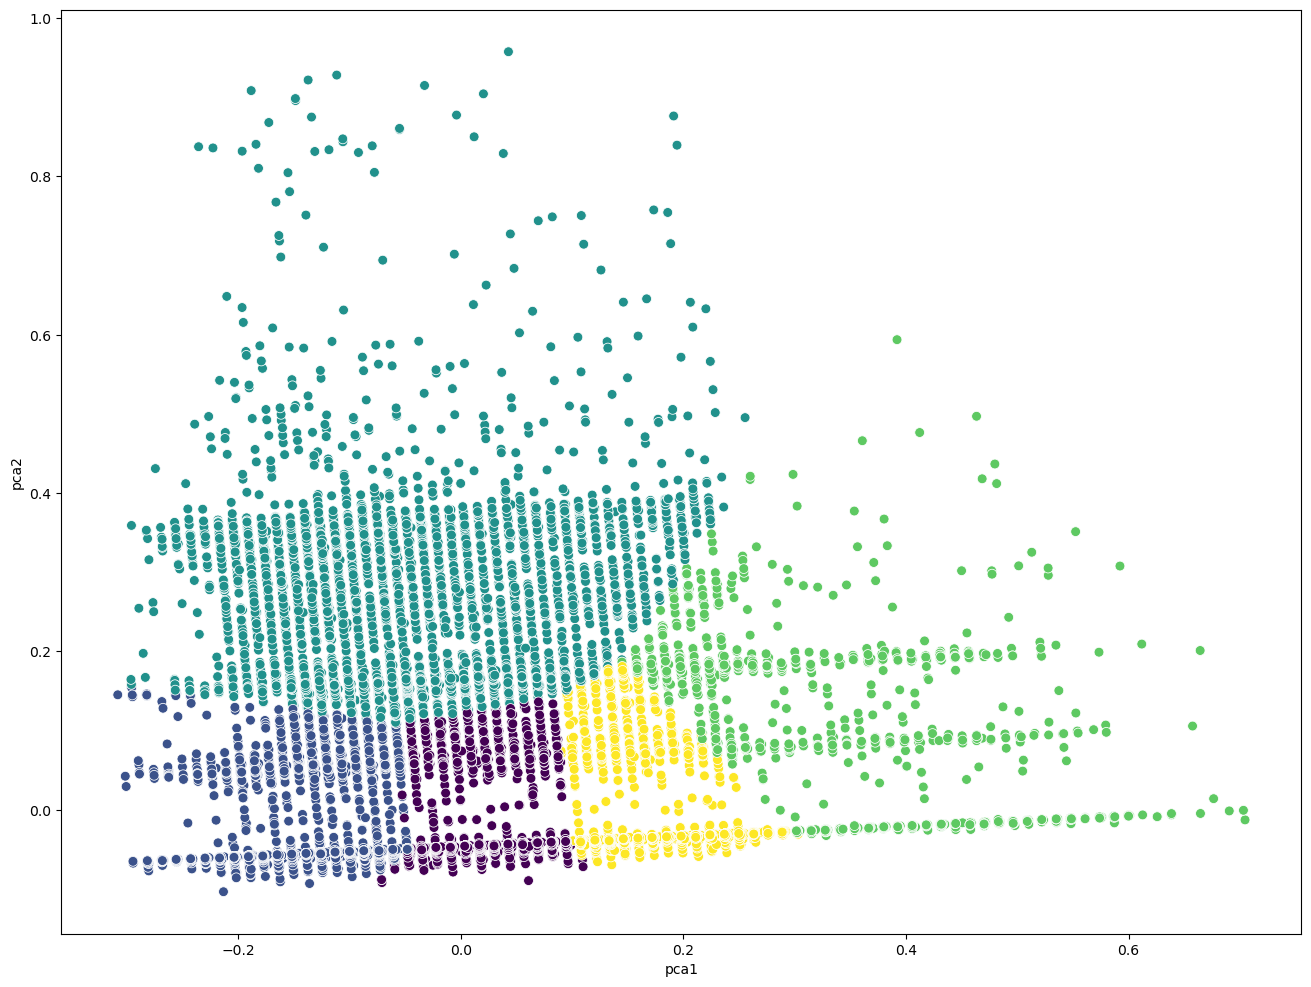

In [66]:
# code here
import seaborn as sns

sns.scatterplot(pca_result, x='pca1',y='pca2',c=labels,s=50)
# sns.scatterplot(pca_centroids, x='pca1',y='pca2', s=200, c='red', marker='X')
plt.show()

### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

In [67]:
# code here
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.2f}')

Inertia: 411.57


##### 
Lower Inertia: Generally, a lower inertia value indicates that the data points are closer to their respective centroids, meaning the clusters are more compact and well-formed.
Higher Inertia: A higher inertia value suggests that data points are, on average, further from their cluster centroids, indicating less compact and potentially less well-defined clusters.

**The silhouette score**

Make the necessary imports from scikit learn and compute the silhouette score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [68]:
# code here
silhouette_avg = silhouette_score(X_norm, kmeans.labels_)

In [69]:
print(f'Silhhouette Score: {silhouette_avg:.2f}')

Silhhouette Score: 0.40


You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

In [78]:
# code here
import numpy as np
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

range_n_clusters = list(np.arange(2,21,1))

In [108]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer

# param_grid = {
#     'n_clusters': range(2,10)
# }

# def silhouette_scorer(estimator, X):
#     cluster_labels = estimator.fit_predict(X)
#     return silhouette_score

# grid_search = GridSearchCV(KMeans(random_state=42), 
#                            param_grid,
#                            scoring=make_scorer(silhouette_scorer, metric='euclidean'), 
#                            return_train_score=True, 
#                            n_jobs=-1)

# grid_search.fit(X_norm)

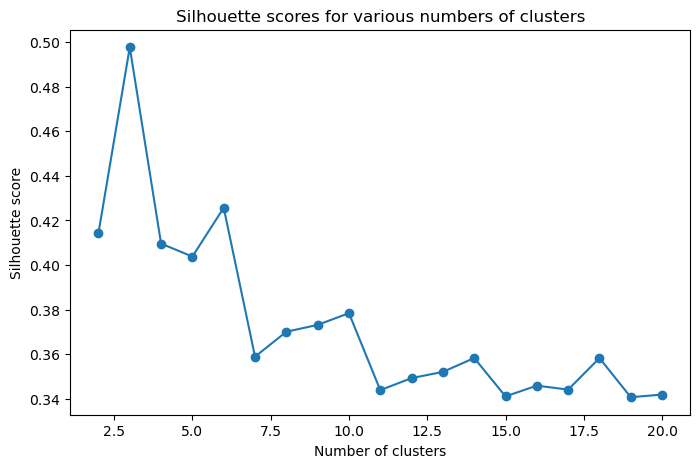

In [112]:
silhouette_avg = []
for num_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(X_norm)
    

    cluster_labels = kmeans.labels_
    

    silhouette_avg.append(silhouette_score(X_norm, cluster_labels))

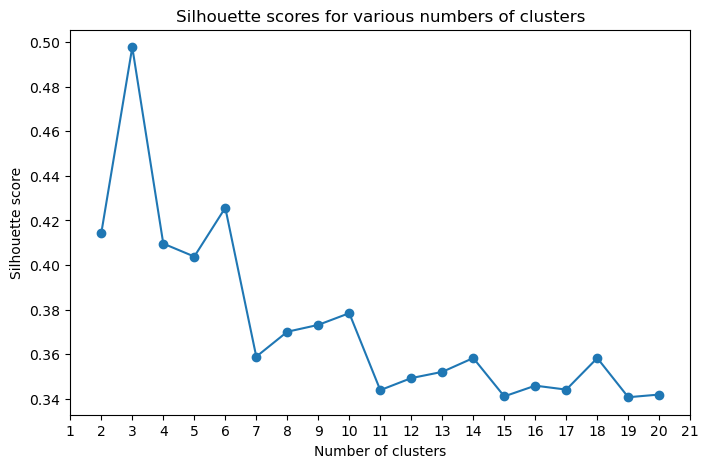

In [114]:
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title("Silhouette scores for various numbers of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.xticks(range(1,22))
plt.show()

What is the optimal number of clusters that you obtained?

4

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

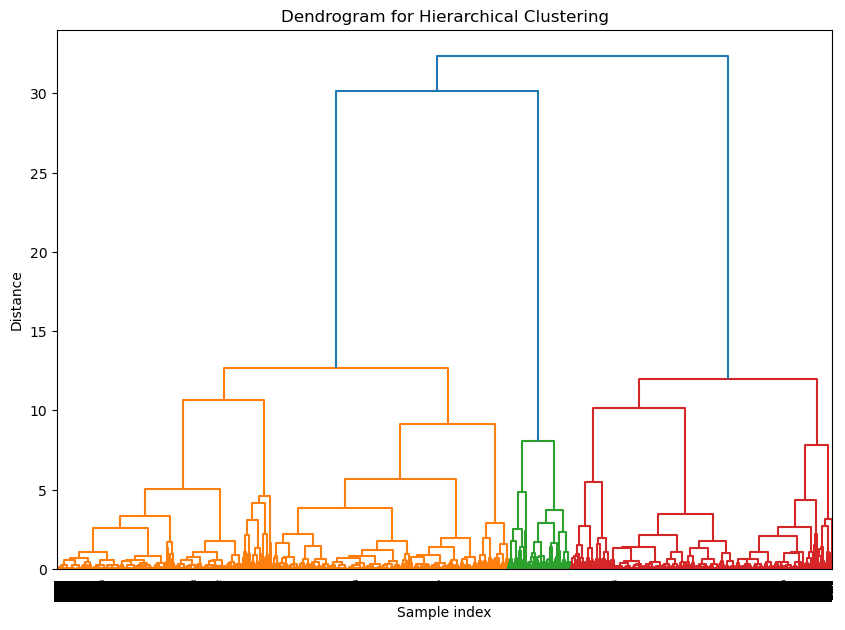

In [116]:
# code here
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

linked = linkage(X_norm, 
                 method='ward', 
                 metric='euclidean'
                )

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=range(1, len(X_norm) + 1),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

How many clusters did you find?

3

In [142]:
max_clusters = 3
clusters = fcluster(linked, max_clusters, criterion='maxclust')
hierarchical_labels = fcluster(linked, max_clusters, criterion='maxclust')

print("Cluster assignments:", clusters)

Cluster assignments: [1 3 3 ... 1 1 3]


Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [143]:
# code here
kmeans = KMeans(n_clusters=max_clusters, random_state=0).fit(X_norm)
kmeans_labels = kmeans.labels_
print("Hierarchical Clustering Labels:", hierarchical_labels)
print("K-Means Clustering Labels:", kmeans_labels)

Hierarchical Clustering Labels: [1 3 3 ... 1 1 3]
K-Means Clustering Labels: [2 2 0 ... 2 2 1]


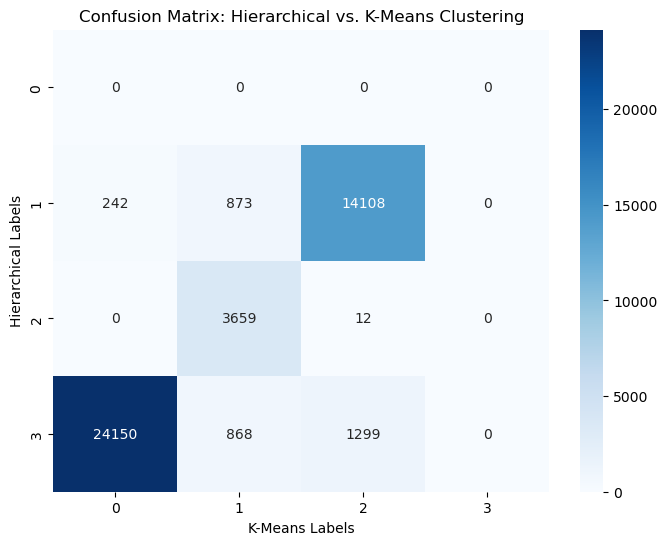

In [144]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(hierarchical_labels, kmeans_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d',
            cmap='Blues')
plt.title('Confusion Matrix: Hierarchical vs. K-Means Clustering')
plt.xlabel('K-Means Labels')
plt.ylabel('Hierarchical Labels')
plt.show()

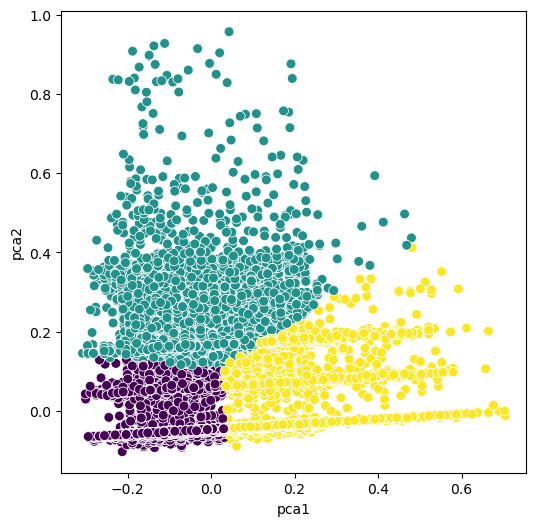

In [147]:
# code here
import seaborn as sns
plt.figure(figsize=(6,6))
sns.scatterplot(pca_result, x='pca1',y='pca2',c=kmeans_labels,s=50)
plt.show()

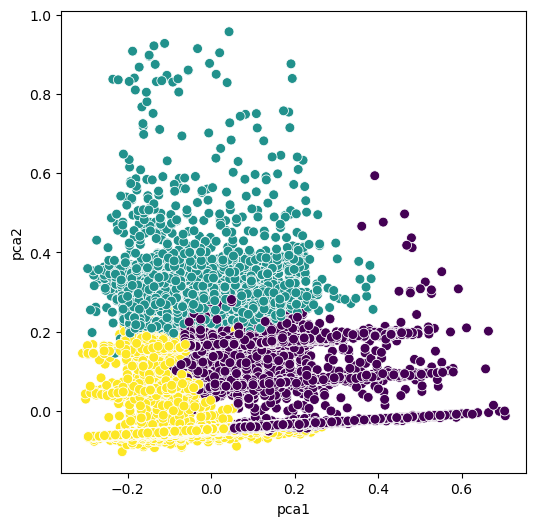

In [148]:
# code here
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(pca_result, x='pca1',y='pca2',c=hierarchical_labels,s=50)
plt.show()

### Application: clustering images

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [165]:
# install skimage
#Code here

from skimage import io
from skimage.color import rgb2lab, lab2rgb
# image = io.imread('../data/ishihara-test-hero-compressor.jpg')
image = io.imread('../data/istockphoto-1470677566-2048x2048.webp')

In [240]:
pixels = image.reshape(-1, 3)

n_colors = 3
kmeans = KMeans(n_clusters=n_colors, random_state=42)
kmeans.fit(pixels)

new_colors = kmeans.cluster_centers_[kmeans.predict(pixels)]
reduced_image = new_colors.reshape(image.shape).astype(np.uint8)

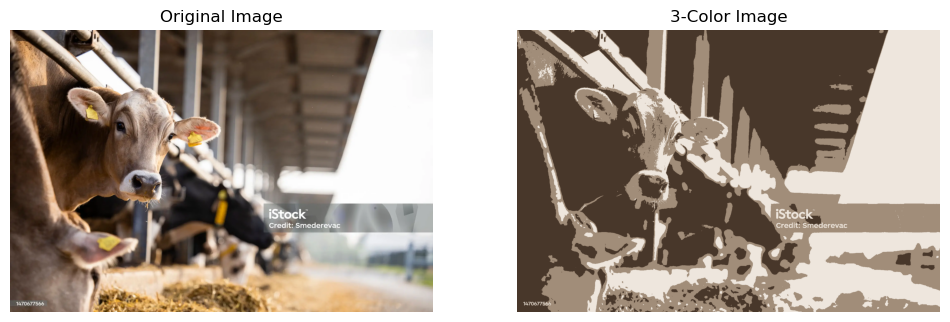

In [241]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(reduced_image)
ax[1].set_title('3-Color Image')
ax[1].axis('off')

plt.show()

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [182]:
# code here
from sklearn.datasets import load_digits
digits = load_digits()

data = digits.data

In [184]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=10, random_state=42)

In [279]:
clusters = kmeans.labels_
# cluster_counts = np.bincount(clusters)

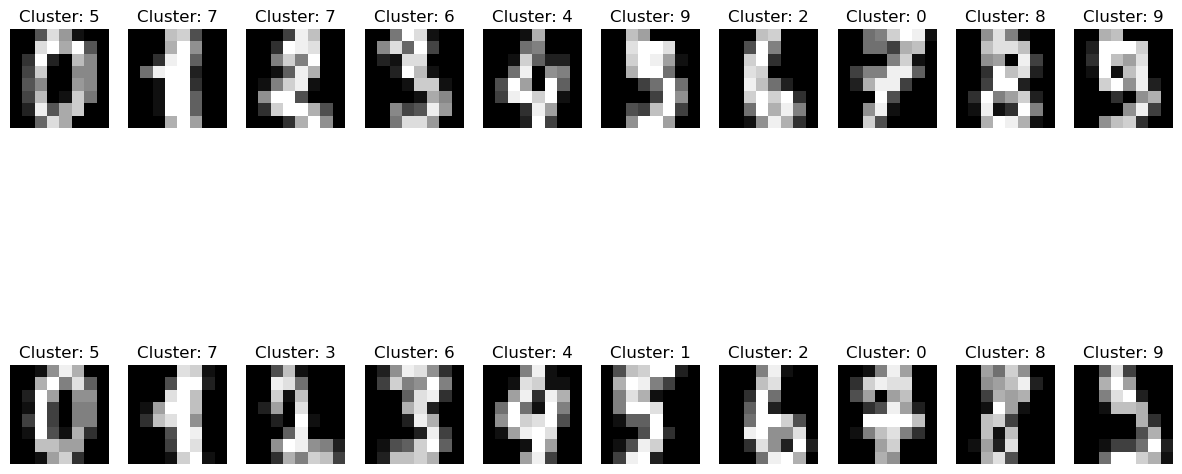

In [211]:
fig, axes = plt.subplots(2, 10, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Cluster: {clusters[i]}')
    ax.axis('off')

plt.show()

# cluster_counts

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

In [233]:
clusters_map = pd.DataFrame(clusters)[0].map({9:9, 8:8, 0:7, 1:5, 6:3, 3:2, 4:4, 5:0, 7:1, 2:6})

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

<Axes: >

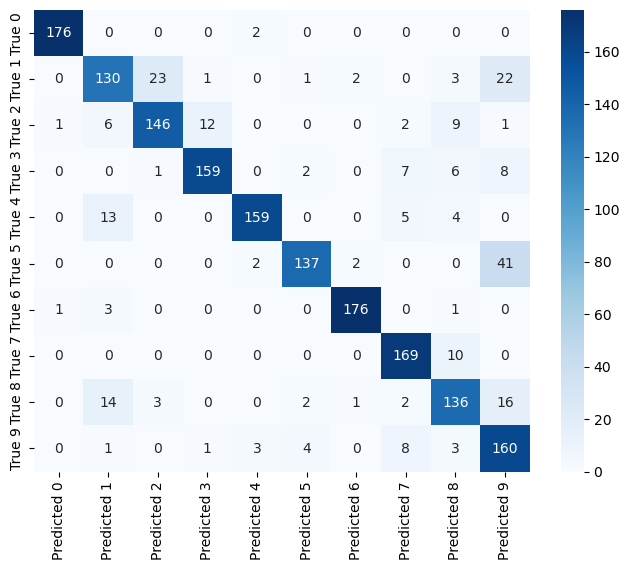

In [246]:
# code here
conf_matrix = confusion_matrix(digits.target, clusters_map)

conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=[f"True {i}" for i in range(10)], 
                              columns=[f"Predicted {i}" for i in range(10)])

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_df, 
            annot=True, 
            fmt='d',
            cmap='Blues')

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [236]:
# code here
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(digits.target, clusters_map)
print(accuracy)

0.8614357262103506


Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

In [ ]:
# code here

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [243]:
# code here
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(data)

kmeans_2d = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_2d.fit(data_2d)

clusters_2d = kmeans_2d.labels_

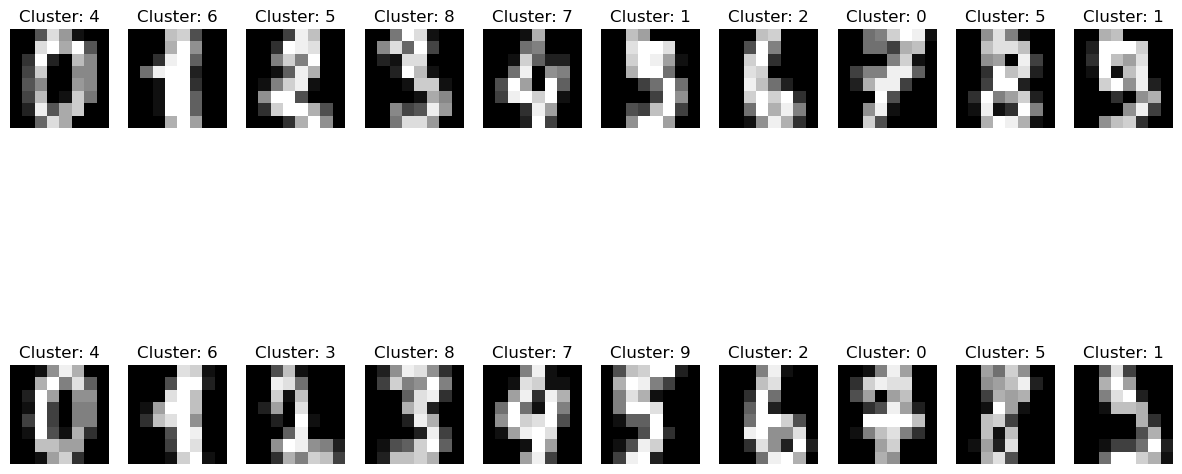

In [244]:
fig, axes = plt.subplots(2, 10, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Cluster: {clusters_2d[i]}')
    ax.axis('off')

plt.show()

<Axes: >

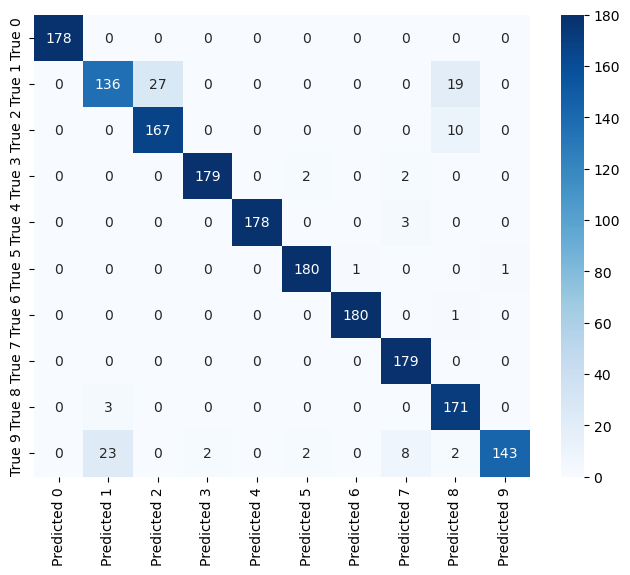

In [275]:
clusters_2d_map = pd.DataFrame(clusters_2d)[0].map({0:7,1:9,2:6,3:2,4:0,5:8,6:1,7:4,8:3,9:5})

conf_matrix_2d = confusion_matrix(digits.target, clusters_2d_map)

conf_matrix_df_2d = pd.DataFrame(conf_matrix_2d, 
                              index=[f"True {i}" for i in range(10)], 
                              columns=[f"Predicted {i}" for i in range(10)])

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_df_2d, 
            annot=True, 
            fmt='d',
            cmap='Blues')

In [277]:
accuracy_2d = accuracy_score(digits.target, clusters_2d_map)
print(accuracy_2d)

0.9410127991096272
